# (7주차) 10월26일
> Pytorch CNN (MNIST 3,7)

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-z7YonYSeq4PyhLt-ab37OJ

`-` (1/2) CNN 모형구축  (MNIST 3,7)

`-` (2/2) 과제설명 

### import 

In [86]:
import torch 
from fastai.vision.all import * 

In [87]:
import graphviz

In [88]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

### data 

`-` download data 

In [89]:
path = untar_data(URLs.MNIST_SAMPLE)

In [90]:
path.ls()

(#3) [Path('/home/cgb4/.fastai/data/mnist_sample/labels.csv'),Path('/home/cgb4/.fastai/data/mnist_sample/train'),Path('/home/cgb4/.fastai/data/mnist_sample/valid')]

`-` list 

In [91]:
threes=(path/'train'/'3').ls()
sevens=(path/'train'/'7').ls()

`-` list $\to$ image 

In [92]:
Image.open(threes[4])

`-` image $\to$ tensor 

In [93]:
tensor(Image.open(threes[4]))

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  72, 156,
         241, 254, 255, 188,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

- 여기에서 tensor는 파이토치가 아니라 fastai에서 구현한 함수임 

`-` 여러개의 리스트를 모두 텐서로 바꿔보자. 

In [94]:
seven_tensor = torch.stack([tensor(Image.open(i)) for i in sevens]).float()/255
three_tensor = torch.stack([tensor(Image.open(i)) for i in threes]).float()/255

`-` $X$와 $y$를 만들자. 

In [95]:
seven_tensor.shape, three_tensor.shape

(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

In [96]:
y=torch.tensor([0.0]*6265+ [1.0]*6131).reshape(12396,1)

In [97]:
X=torch.vstack([seven_tensor,three_tensor]).reshape(12396,-1)

In [98]:
X.shape, y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [99]:
X=X.reshape(12396,1,28,28)

In [100]:
X.shape

torch.Size([12396, 1, 28, 28])

### 1. 지난시간까지의 모형 (직접네트워크설계, pytorch)

#### 2d convolution with windowsize=5

In [101]:
c1=torch.nn.Conv2d(1,16,5) # 입력채널=1 (흑백이므로), 출력채널=16, 윈도우크기5 

In [102]:
X.shape, c1(X).shape

(torch.Size([12396, 1, 28, 28]), torch.Size([12396, 16, 24, 24]))

#### MaxPool2d

In [103]:
m1=torch.nn.MaxPool2d(2)

In [104]:
X.shape,c1(X).shape,m1(c1(X)).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]))

#### ReLU 

In [105]:
a1=torch.nn.ReLU()

In [106]:
X.shape,c1(X).shape, m1(c1(X)).shape, a1(m1(c1(X))).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 16, 12, 12]))

#### flatten 

In [107]:
class Flatten(torch.nn.Module):
    def forward(self,x): 
        return x.reshape(12396,-1)

In [108]:
flatten=Flatten()

In [109]:
X.shape,c1(X).shape, m1(c1(X)).shape, a1(m1(c1(X))).shape, flatten(a1(m1(c1(X)))).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 2304]))

#### linear 

In [110]:
l1=torch.nn.Linear(in_features=2304,out_features=1) 

In [111]:
X.shape,\
c1(X).shape, \
m1(c1(X)).shape, \
a1(m1(c1(X))).shape, \
flatten(a1(m1(c1(X)))).shape, \
l1(flatten(a1(m1(c1(X))))).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 2304]),
 torch.Size([12396, 1]))

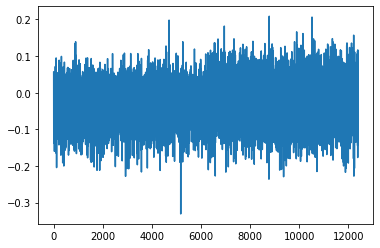

In [112]:
plt.plot(l1(flatten(a1(m1(c1(X))))).data)

#### networks 설계 

In [113]:
net = nn.Sequential(c1,m1,a1,flatten,l1)
## 마지막의 sigmoid는 생략한다. torch.nn..BCEWithLogitsLoss()에 내장되어 있을것이므로 

`-` 손실함수와 옵티마이저 정의 

In [114]:
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters())

`-` step1~4

In [115]:
for epoc in range(200): 
    ## 1 
    yhat=net(X)
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad()

In [116]:
a2= torch.nn.Sigmoid()

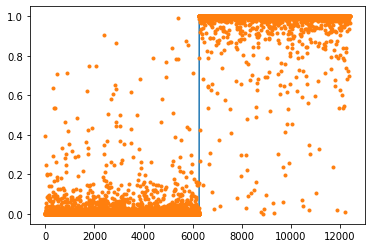

In [117]:
plt.plot(y)
plt.plot(a2(yhat.data),'.')

In [118]:
ypred=a2(yhat.data)>0.5 

In [119]:
sum(ypred==y)/12396

tensor([0.9938])

### 2. 드랍이웃, 배치추가 (직접네트워크설계, pytorch+fastai) 

#### step1: dls를 만들자. 

In [120]:
ds=torch.utils.data.TensorDataset(X,y)

In [121]:
ds.tensors[0].shape

torch.Size([12396, 1, 28, 28])

In [122]:
ds1,ds2 = torch.utils.data.random_split(ds,[10000,2396]) 

In [123]:
dl1 = torch.utils.data.DataLoader(ds1,batch_size=500) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=2396) 

In [124]:
dls=DataLoaders(dl1,dl2) 

#### step2: 아키텍처, 손실함수, 옵티마이저 

In [125]:
class Flatten(torch.nn.Module):
    def forward(self,x): 
        return x.reshape(x.shape[0],-1)

In [126]:
net=torch.nn.Sequential(
    torch.nn.Conv2d(1,16,5), 
    torch.nn.MaxPool2d(2), 
    torch.nn.ReLU(),
    torch.nn.Dropout2d(), 
    Flatten(),
    torch.nn.Linear(2304,1))

In [127]:
loss_fn=torch.nn.BCEWithLogitsLoss()
#optimizer= torch.optim.Adam(net.parameters())

#### step3: lrnr 생성 후 적합

In [128]:
lrnr1 = Learner(dls,net,opt_func=Adam,loss_func=loss_fn) 

In [129]:
lrnr1.fit(10)

epoch,train_loss,valid_loss,time
0,0.430748,0.218082,00:00
1,0.262507,0.093608,00:00
2,0.178563,0.070512,00:00
3,0.132288,0.061353,00:00
4,0.104299,0.055355,00:00
5,0.086001,0.050486,00:00
6,0.073517,0.047254,00:00
7,0.064433,0.044630,00:00
8,0.057706,0.042601,00:00
9,0.053289,0.040278,00:00


`-` 결과를 시각화하면 아래와 같다. 

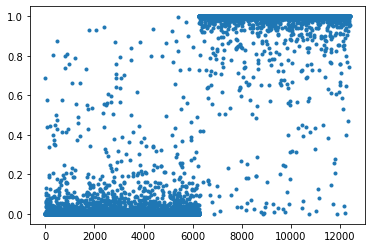

In [135]:
plt.plot(a2(net(X.to("cuda:0")).to("cpu").data),'.')

`-` 빠르고 적합결과도 좋음 

### 3. resnet34 (기존의 네트워크 사용, 순수 fastai)

`-` 데이터로부터 새로운 데이터로더스를 만들고 이를 dls2라고 하자.

In [137]:
path=untar_data(URLs.MNIST_SAMPLE) 
path

Path('/home/cgb4/.fastai/data/mnist_sample')

In [140]:
dls2=ImageDataLoaders.from_folder(
    path,
    train='train',
    valid_pct=0.2)     

`-` 러너오브젝트를 생성하고 학습하자. 

In [145]:
lrnr2=cnn_learner(dls2,resnet34,metrics=error_rate)
lrnr2.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.284949,0.159780,0.055787,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.042842,0.016358,0.006584,00:09


`-` 결과관찰

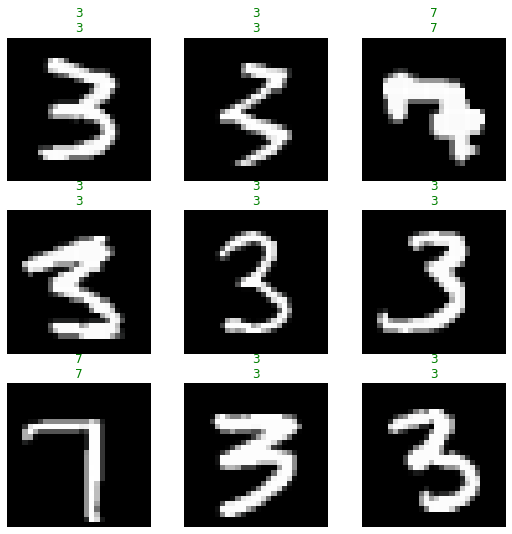

In [143]:
lrnr2.show_results()

### 모형을 뜯어보는 방법 (lrnr1.model)

`-` 우선 방법2로 돌아가자.

In [219]:
net(X.to("cuda:0"))

tensor([[-8.1382],
        [-6.9877],
        [ 0.7937],
        ...,
        [12.1038],
        [15.0634],
        [ 7.9055]], device='cuda:0', grad_fn=<AddmmBackward>)

`-` 네트워크 구조

In [182]:
net

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): Flatten()
  (5): Linear(in_features=2304, out_features=1, bias=True)
)

`-` 층별변환과정

In [196]:
print(X.shape, '--> input image')
print(net[0](X.to("cuda:0")).shape, '--> 2dConv')
print(net[1](net[0](X.to("cuda:0"))).shape, '--> MaxPool2d')
print(net[2](net[1](net[0](X.to("cuda:0")))).shape, '--> ReLU')
print(net[3](net[2](net[1](net[0](X.to("cuda:0"))))).shape, '--> Dropout2d')
print(net[4](net[3](net[2](net[1](net[0](X.to("cuda:0")))))).shape, '--> Flatten')
print(net[5](net[4](net[3](net[2](net[1](net[0](X.to("cuda:0"))))))).shape, '--> Linear')

torch.Size([12396, 1, 28, 28]) --> input image
torch.Size([12396, 16, 24, 24]) --> 2dConv
torch.Size([12396, 16, 12, 12]) --> MaxPool2d
torch.Size([12396, 16, 12, 12]) --> ReLU
torch.Size([12396, 16, 12, 12]) --> Dropout2d
torch.Size([12396, 2304]) --> Flatten
torch.Size([12396, 1]) --> Linear


`-` 최종결과

In [198]:
net[5](net[4](net[3](net[2](net[1](net[0](X.to("cuda:0")))))))

tensor([[-8.1382],
        [-6.9877],
        [ 0.7937],
        ...,
        [12.1038],
        [15.0634],
        [ 7.9055]], device='cuda:0', grad_fn=<AddmmBackward>)

In [199]:
net(X.to("cuda:0"))

tensor([[-8.1382],
        [-6.9877],
        [ 0.7937],
        ...,
        [12.1038],
        [15.0634],
        [ 7.9055]], device='cuda:0', grad_fn=<AddmmBackward>)

`-` lrnr1자체를 활용해도 층별변환과정을 추적할수 있음. (lrnr1.model = net 임을 이용) 

In [204]:
lrnr1.model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): Flatten()
  (5): Linear(in_features=2304, out_features=1, bias=True)
)

In [205]:
lrnr1.model[0]

Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))

In [202]:
lrnr1.model(X.to("cuda:0"))

tensor([[-8.1382],
        [-6.9877],
        [ 0.7937],
        ...,
        [12.1038],
        [15.0634],
        [ 7.9055]], device='cuda:0', grad_fn=<AddmmBackward>)

In [206]:
print(X.shape, '--> input image')
print(lrnr1.model[0](X.to("cuda:0")).shape, '--> 2dConv')
print(lrnr1.model[1](lrnr1.model[0](X.to("cuda:0"))).shape, '--> MaxPool2d')
print(lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0")))).shape, '--> ReLU')
print(lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0"))))).shape, '--> Dropout2d')
print(lrnr1.model[4](lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0")))))).shape, '--> Flatten')
print(lrnr1.model[5](lrnr1.model[4](lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0"))))))).shape, '--> Linear')

torch.Size([12396, 1, 28, 28]) --> input image
torch.Size([12396, 16, 24, 24]) --> 2dConv
torch.Size([12396, 16, 12, 12]) --> MaxPool2d
torch.Size([12396, 16, 12, 12]) --> ReLU
torch.Size([12396, 16, 12, 12]) --> Dropout2d
torch.Size([12396, 2304]) --> Flatten
torch.Size([12396, 1]) --> Linear


`-` 정리: 모형은 항상 아래와 같이 2d-part 와 1d-part로 나누어진다. 
```
torch.Size([12396, 1, 28, 28]) --> input image
torch.Size([12396, 16, 24, 24]) --> 2dConv
torch.Size([12396, 16, 12, 12]) --> MaxPool2d
torch.Size([12396, 16, 12, 12]) --> ReLU
torch.Size([12396, 16, 12, 12]) --> Dropout2d
===============================================================
torch.Size([12396, 2304]) --> Flatten
torch.Size([12396, 1]) --> Linear
```

`-` 2d-part: 
- 2d선형변환: nn.torch.nn.Conv2d()
- 2d비선형변환: torch.nn.MaxPool2d(), torch.nn.ReLU()

`-` 1d-part:
- 1d선형변환: torch.nn.Linear() 
- 1d비선형변환: torch.nn.ReLU()

In [211]:
_net1=torch.nn.Sequential(
    net[0],
    net[1],
    net[2],
    net[3])
_net2=torch.nn.Sequential(
    net[4],
    net[5])

In [212]:
_net1

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
)

In [213]:
_net2

Sequential(
  (0): Flatten()
  (1): Linear(in_features=2304, out_features=1, bias=True)
)

In [214]:
_net=torch.nn.Sequential(_net1,_net2)

In [218]:
_net[1](_net[0](X.to('cuda:0')))

tensor([[-8.1382],
        [-6.9877],
        [ 0.7937],
        ...,
        [12.1038],
        [15.0634],
        [ 7.9055]], device='cuda:0', grad_fn=<AddmmBackward>)

### lrnr2.model 분석 

`-` 아래의 모형은 현재 가장 성능이 좋은 모형(state of the art)중 하나인 resnet이다. 

In [226]:
lrnr2.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

`-` 특징 
- 2d-part: 입력채널이3이다, Conv2d에 padding/stride의 옵션이 있다, 드랍아웃이 없다, 배치정규화가 있다. 
- 1d-part: 배치정규화가 있다, 출력의 차원이 2이다.

***DLS, Networks***
- 네트워크의 형태에 따라서 dls의 형태도 다르게 만들어야 한다. 
- MLP모형: 입력이 $784$, 첫 네트워크의 형태가 $784 \to 30$ 인 torch.nn.Linear()
- CNN모형: 입력이 $1\times 28 \times 28$, 첫 네트워크의 형태가 $1\times 28 \times 28 \to 16 \times 24 \times 24$ 인 torch.nn.Conv2d()
- Resnet34: 입력이 $3\times 28 \times 28$, 첫 네트워크의 형태가 $3\times 28 \times 28 \to ??$ 

***참고***

|$y$|분포가정|마지막층의 활성화함수|손실함수(파이토치)|
|:--:|:--:|:--:|:--:|
|3.45, 4.43, ... (연속형) |정규분포|Linear|MSEloss|
|0 or 1|이항분포(베르누이)|Sigmoid| BCEloss|
|[0,0,1], [0,1,0], [1,0,0]| 다항분포|Softmax| CrossEntropyLoss|

`-` 딥러닝 연구의 네가지 축 

(1) 아키텍처 $(\star)$
- 한 영역의 전문적인 지식이 필요한 것이 아닌것 같다. 
- 끈기, 약간의 운, 직관, 좋은컴퓨터.. 

(2) 손실함수 
- 통계적지식필요 // 기존의 손실함수를 변형하는 형태 (패널티텀활용)

(3) 미분계산 
- 병렬처리등에 대한 지식 필요 

(4) 옵티마이저 
- 최적화에 대한 이론적 토대 필요 


`-` 딥러닝 이전까지의 아키텍처에 대한 연구 
- 파라메트릭 모형: 전문가 
- 넌파라메트릭 모형: 전문가
- 딥러닝: 상대적으로 비전문가

`-` 특징: 비전문가도 만들수 있다 + 블랙박스 (내부연산을 뜯어볼 수는 있지만 우리가 해석하기 어려움) 

`-` 설명가능한 딥러닝에 대한 요구 (XAI)